# Cleaning
I will begin by cleaning the data using PANDAS data frames. I will be removing nonessential data columns for the time series analysis.

In [1]:
# Imports
import pandas as pd
import numpy as np

In [2]:
# Read csv
BING_data = pd.read_csv('../data/Bing-COVID19-Data.csv')

In [3]:
# Check data types
BING_data.dtypes

ID                   int64
Updated             object
Confirmed            int64
ConfirmedChange    float64
Deaths             float64
DeathsChange       float64
Recovered          float64
RecoveredChange    float64
Latitude           float64
Longitude          float64
ISO2                object
ISO3                object
Country_Region      object
AdminRegion1        object
AdminRegion2        object
dtype: object

It may be important to change 'Confirmed' to float64 to ensure that it meshes well with the rest of the data.

In [4]:
# Swap dtype to float64
BING_data['Confirmed'] = BING_data['Confirmed'].astype('float64')

In [5]:
# Separate worldwide dataset
WWBING_data = BING_data[BING_data['Country_Region']=='Worldwide']

In [6]:
# Columns to be dropped; we are only looking at confirmed cases and confirmed deaths
dropcols=['ID', 'Recovered', 'RecoveredChange', 'Latitude', 'Longitude', 'ISO2', 'ISO3', 
          'Country_Region', 'AdminRegion1', 'AdminRegion2']

In [7]:
WWBING_data = WWBING_data.drop(columns=dropcols)

In [8]:
WWBING_data

,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange
0,01/21/2020,262.0,NaN,0.0,NaN
1,01/22/2020,313.0,51.0,0.0,0.0
2,01/23/2020,578.0,265.0,0.0,0.0
3,01/24/2020,841.0,263.0,0.0,0.0
4,01/25/2020,1320.0,479.0,0.0,0.0
...,...,...,...,...,...
115,05/15/2020,4531811.0,97221.0,307001.0,5064.0
116,05/16/2020,4626632.0,94821.0,311363.0,4362.0
117,05/17/2020,4710614.0,83982.0,315023.0,3660.0
118,05/18/2020,4786672.0,76058.0,317695.0,2672.0


In [9]:
# We are only looking at data from March to present
WWBING_data = WWBING_data[WWBING_data['Updated']>='03/01/2020']

In [10]:
# Now for US data
USBING_data = BING_data[BING_data['Country_Region']=='United States']

In [11]:
# We are looking at region data only
USBING_data = USBING_data[USBING_data['AdminRegion1'].isnull()]

In [12]:
USBING_data = USBING_data.drop(columns=dropcols)

In [13]:
USBING_data = USBING_data[USBING_data['Updated']>='03/01/2020']

At this point, I can merge the data sets and update their headings.

In [14]:
# This way, the Country_Region is redundant, hence the prior removal
WWBING_data.rename(columns={'Confirmed': 'ConfirmedWW', 
                            'ConfirmedChange': 'ConfirmedChangeWW',
                            'Deaths': 'DeathsWW',
                            'DeathsChange': 'DeathsChangeWW'}, inplace=True)

USBING_data.rename(columns={'Confirmed': 'ConfirmedUS', 
                            'ConfirmedChange': 'ConfirmedChangeUS',
                            'Deaths': 'DeathsUS',
                            'DeathsChange': 'DeathsChangeUS'}, inplace=True)

C:\Users\Will\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
BING_df = pd.merge(WWBING_data, USBING_data, on='Updated', how='outer')

In [16]:
# Should be noted that WW data is missing the most recent row
BING_df

,Updated,ConfirmedWW,ConfirmedChangeWW,DeathsWW,DeathsChangeWW,ConfirmedUS,ConfirmedChangeUS,DeathsUS,DeathsChangeUS
0,03/01/2020,87137.0,1734.0,2977.0,53.0,42.0,2.0,4.0,1.0
1,03/02/2020,88948.0,1811.0,3043.0,66.0,57.0,15.0,8.0,4.0
2,03/03/2020,90869.0,1921.0,3112.0,69.0,85.0,28.0,11.0,3.0
3,03/04/2020,93091.0,2222.0,3198.0,86.0,111.0,26.0,13.0,2.0
4,03/05/2020,95324.0,2233.0,3281.0,83.0,175.0,64.0,13.0,0.0
...,...,...,...,...,...,...,...,...,...
76,05/16/2020,4626632.0,94821.0,311363.0,4362.0,1457426.0,24527.0,82654.0,1231.0
77,05/17/2020,4710614.0,83982.0,315023.0,3660.0,1477157.0,19731.0,83439.0,785.0
78,05/18/2020,4786672.0,76058.0,317695.0,2672.0,1498264.0,21107.0,84231.0,792.0
79,05/19/2020,4889287.0,102615.0,322683.0,4988.0,1517926.0,19662.0,85656.0,1425.0


# EDA

Next, the data should be explored.

In [17]:
# Install may be necessary for this library
# !pip install --user pandas_profiling

In [18]:
import pandas_profiling as pp

In [19]:
# Apply lambda function to get rid of scientific notation
BING_df.describe().T.apply(lambda s: s.apply(lambda x: format(x, 'f')))

,count,mean,std,min,25%,50%,75%,max
ConfirmedWW,80.000000,1871689.975000,1567484.322510,87137.000000,297531.750000,1636021.000000,3190006.750000,4889287.000000
ConfirmedChangeWW,80.000000,60048.550000,33846.471338,1734.000000,30385.750000,75072.500000,84033.750000,115888.000000
DeathsWW,80.000000,123451.550000,111160.122413,2977.000000,12596.250000,98493.000000,226232.000000,322683.000000
DeathsChangeWW,80.000000,3996.987500,2845.598656,0.000000,1542.500000,4424.000000,5925.750000,11062.000000
ConfirmedUS,81.000000,579907.283951,534584.804594,42.000000,23710.000000,493567.000000,1062675.000000,1540294.000000
ConfirmedChangeUS,81.000000,19015.481481,11942.615361,2.000000,6271.000000,22368.000000,28057.000000,36138.000000
DeathsUS,81.000000,29371.123457,30571.807161,4.000000,301.000000,18547.000000,57137.000000,87184.000000
DeathsChangeUS,81.000000,1076.308642,860.522961,0.000000,68.000000,1175.000000,1825.000000,2701.000000


In [20]:
pp.ProfileReport(BING_df)

Abbreviations 
- Confirmed (C)
- Confirmed Change (CC)
- Deaths (D)
- Deaths Change (DC)
- Worldwide (WW)
- United States (US)

This report is pretty in depth, which I tend to prefer over the describe function from pandas. The things to note here are the variable details, interactions, and correlations. While there is a lot that should probably ignored (ie. the mean and sum of CWW are meaningless), there is a lot of important information to gain. The range of CWW shows the magnitude of change which you would expect to line up with the sum of CCWW is slightly off. This likely means some form of estimation was used. The means of CC and DC will give us some insight into the rate of cases and deaths. In this case, we see that for every `~60,000` cases, there are `~4,000 deaths` (`~6.67%` death rate).

We can see in the interactions that the change rates tend to level off, or in other words, as C increases, CC hits an upper bound according to some hyperbolic function. In fact, I would guess that as the series expands we will see that CC was actually a skewed parabolic function the whole time (increasing sharply, plateauing, then decreasing over time). The same can be seen in D and DC across both US and WW data sets.

Finally, through correlations we can see that most of the data is highly correlated, meaning that as one variable increases, so do the others. When looking at heatmaps, it's important to filter either everything above or everything below the diagonal stretching from the top left (CCWW) to the bottom right (DCUS) so that we don't see redundant data. This is really just something to confirm there isn't something off in the data. If the series were expanded, I would expect that the 'Change' variables become less and less correlated with their counterparts as the rates should decrease over time.


In [21]:
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
# Initially, I got an error for there being no numeric data to plot (doesn't make sense)
BING_df['Updated'] = pd.to_datetime(BING_df['Updated'])
BING_df.rename(columns={'Updated': 'Date'}, inplace=True)
# Set index as 'Date' so that pandas doesn't read separate types
BING_df.set_index('Date', inplace=True, drop=True)
# Same operation for the separated data sets
WWBING_data['Updated'] = pd.to_datetime(WWBING_data['Updated'])
WWBING_data.rename(columns={'Updated': 'Date'}, inplace=True)
WWBING_data.set_index('Date', inplace=True, drop=True)

USBING_data['Updated'] = pd.to_datetime(USBING_data['Updated'])
USBING_data.rename(columns={'Updated': 'Date'}, inplace=True)
USBING_data.set_index('Date', inplace=True, drop=True)

C:\Users\Will\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Will\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


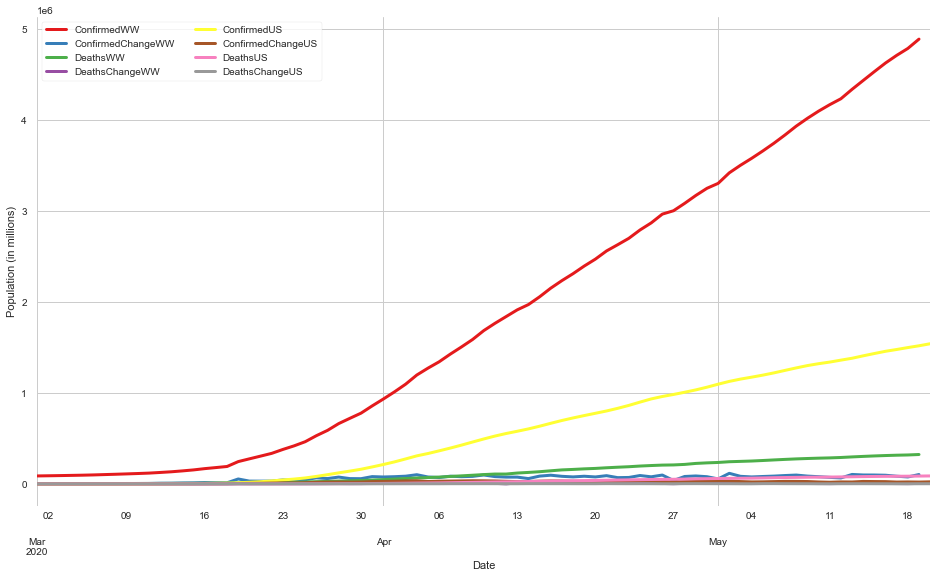

In [23]:
BING_df.plot(figsize=(16,9), linewidth=3, cmap='Set1');
plt.xlabel('Date');
plt.ylabel('Population (in millions)');
plt.legend(ncol=2);
plt.grid(b=True)

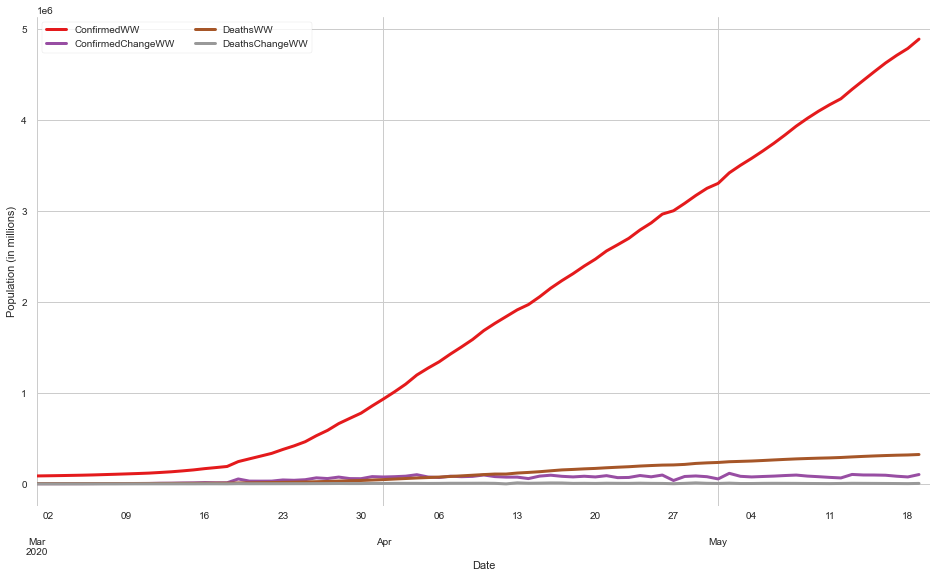

In [24]:
BING_df.filter(regex='WW').plot(figsize=(16,9), linewidth=3, cmap='Set1');
plt.xlabel('Date');
plt.ylabel('Population (in millions)');
plt.legend(ncol=2);
plt.grid(b=True)

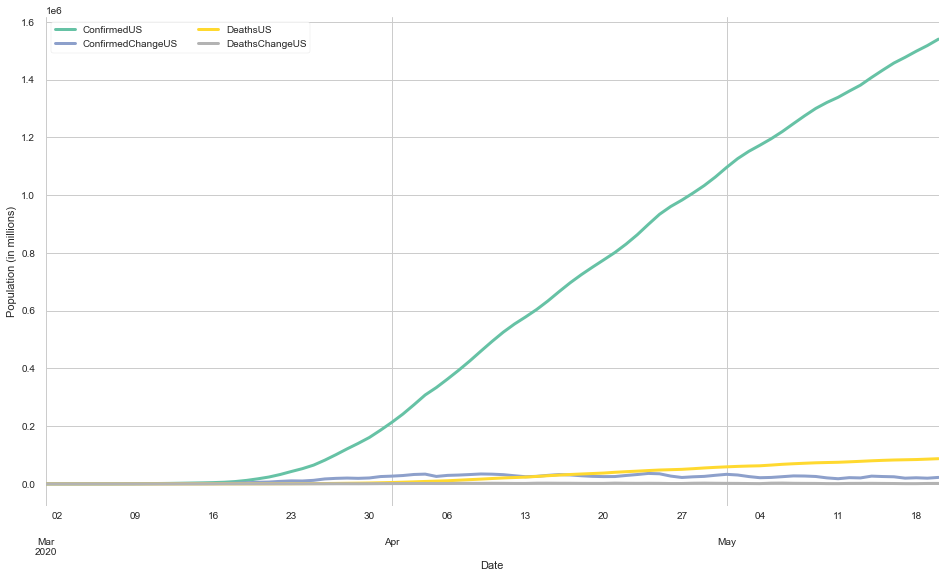

In [25]:
BING_df.filter(regex='US').plot(figsize=(16,9), linewidth=3, cmap='Set2');
plt.xlabel('Date');
plt.ylabel('Population (in millions)');
plt.legend(ncol=2);
plt.grid(b=True)

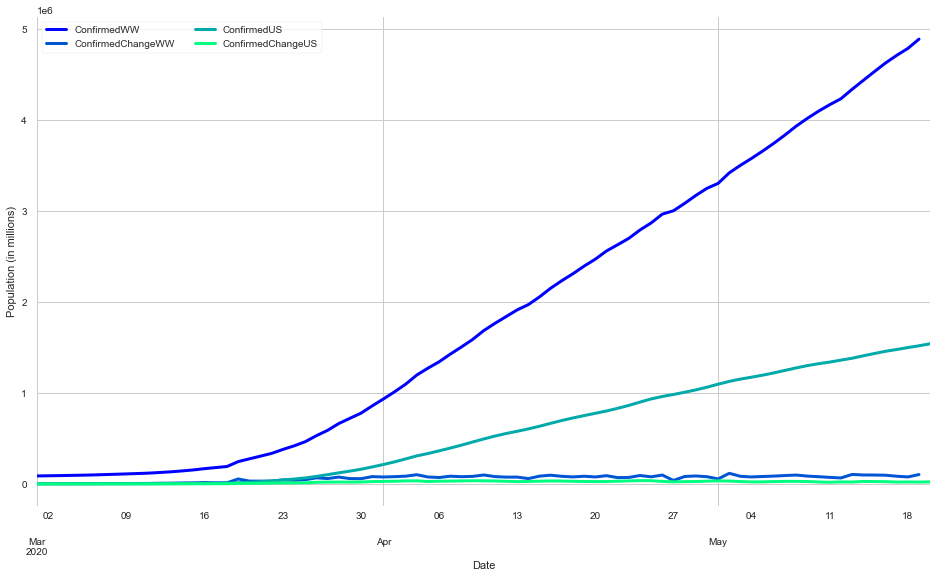

In [26]:
BING_df.filter(regex='Confirmed').plot(figsize=(16,9), linewidth=3, cmap='winter');
plt.xlabel('Date');
plt.ylabel('Population (in millions)');
plt.legend(ncol=2);
plt.grid(b=True)

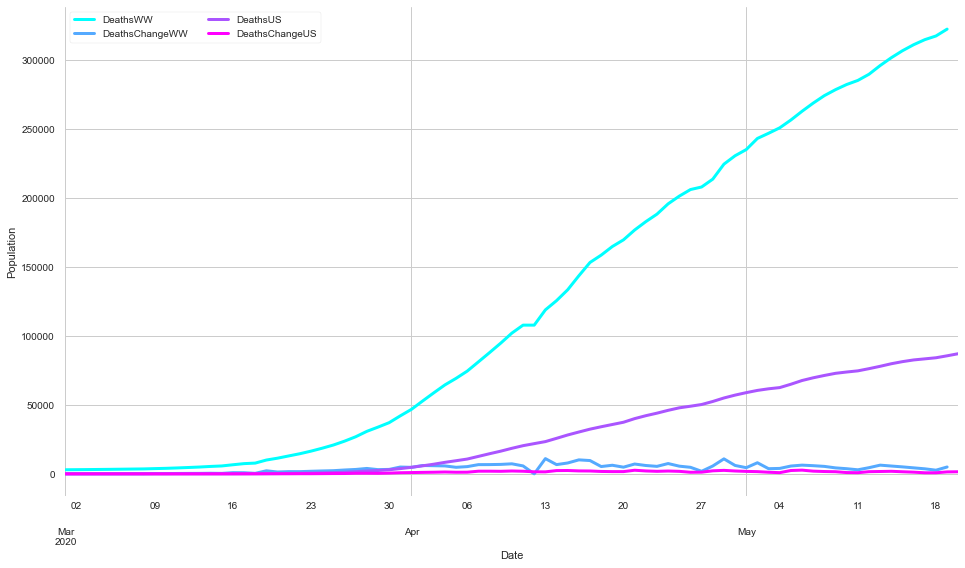

In [32]:
BING_df.filter(regex='Deaths').plot(figsize=(16,9), linewidth=3, cmap='cool');
plt.xlabel('Date');
plt.ylabel('Population');
plt.legend(ncol=2);
plt.grid(b=True)

The data trends show us the magnitude of the data and just how much of the confirmed cases and deaths are accounted for in the US alone. We see that most of the day to day changes are stable and are beginning to just barely see the rates actually decrease.

All of the data in processed in python was from Bing and the visualization data came from ESRI.

Finally, here is an interactive dashboard with a map and individual data point display. Thank you to Srikanta Patra.
(https://datawisesite.wordpress.com/2017/06/26/how-to-embed-tableau-in-jupyter-notebook/)

In [28]:
%%HTML
<div class='tableauPlaceholder' id='viz1590087934116' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;Covid19Dash_15900877930100&#47;Covid19_Overview&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Covid19Dash_15900877930100&#47;Covid19_Overview' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;Covid19Dash_15900877930100&#47;Covid19_Overview&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1590087934116');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>